In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
import cv2
%matplotlib inline

In [2]:
from chart_studio import plotly as py

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [4]:
init_notebook_mode(connected=True)

In [9]:
df = pd.read_csv(".\\Data\\911.csv", on_bad_lines="skip")

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [12]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [15]:
#top 5 zip code
df["zip"].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [18]:
# What are the to 5 townships(twp)
df["twp"].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [24]:
# How Many unique title columns are there
# len(df["title"].unique())
df["title"].nunique()

148

In [27]:
# What is the most common Reason for a 911 call based off of this new column
x = df['title'].iloc[0]

In [32]:
x.split(':')[0]

'EMS'

In [34]:
df["Reason"] = df["title"].apply(lambda title: title.split(":")[0])

In [36]:
df["Reason"][0]

'EMS'

In [38]:
df["Reason"].value_counts().head(1)

EMS    332692
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

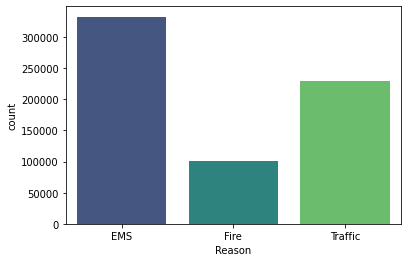

In [43]:
sns.countplot(x="Reason", data=df, palette='viridis')

In [44]:
# What is the data type of the objects in the timeStamp column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [52]:
type(df["timeStamp"].iloc[0])

str

In [54]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [55]:
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [56]:
time = df["timeStamp"].iloc[0]
time.hour

17

In [57]:
time

Timestamp('2015-12-10 17:10:52')

In [61]:
df['Hour'] = df["timeStamp"].apply(lambda  time: time.hour)

In [62]:
df["Month"] = df["timeStamp"].apply(lambda time: time.month)

In [64]:
df["Day of Week"] = df['timeStamp'].apply(lambda time: time.day_of_week)

In [65]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [66]:
dmap = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}

In [68]:
df["Day of Week"] = df["Day of Week"].map(dmap)

In [69]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


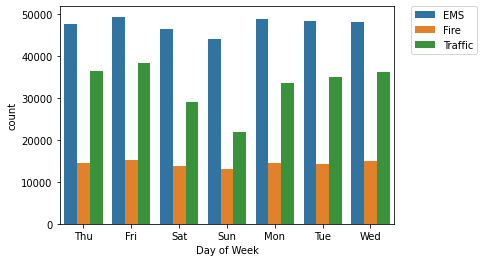

In [73]:
sns.countplot(x="Day of Week", data=df, hue="Reason")
# To relocate the Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

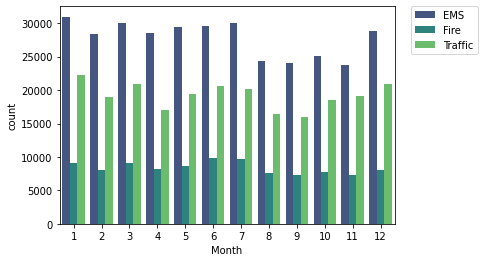

In [76]:
sns.countplot(x=("Month"), data=df, hue="Reason", palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [77]:
byMonth = df.groupby("Month").count()

In [78]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

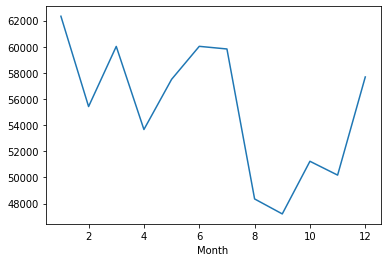

In [81]:
byMonth['lat'].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


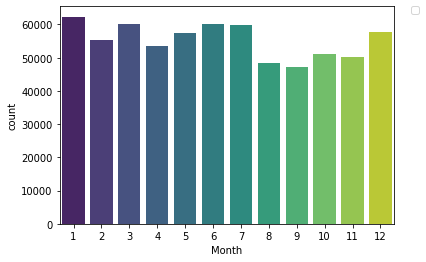

In [83]:
sns.countplot(x=("Month"), data=df, palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

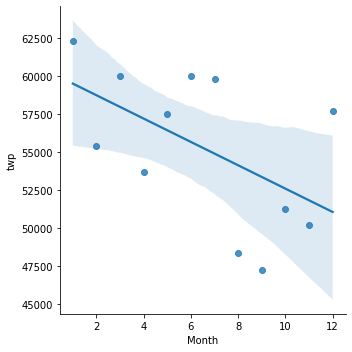

In [85]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index() )

In [86]:
t = df["timeStamp"].iloc[0]

In [90]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

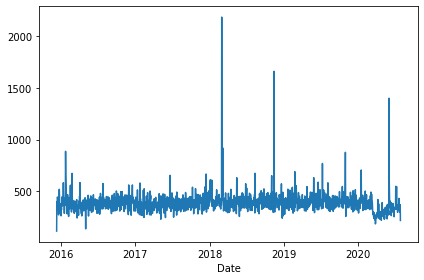

In [95]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

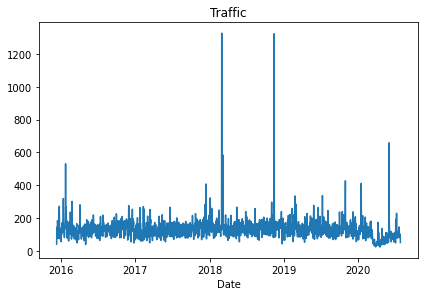

In [99]:
df[df["Reason"]=="Traffic"].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title("Traffic")

Text(0.5, 1.0, 'Fire')

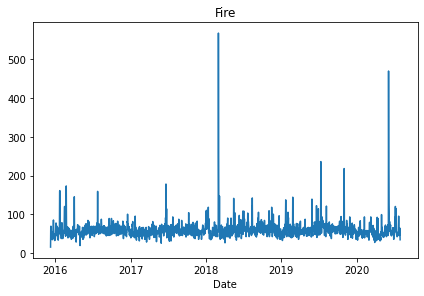

In [100]:
df[df["Reason"]=="Fire"].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title("Fire")

Text(0.5, 1.0, 'EMS')

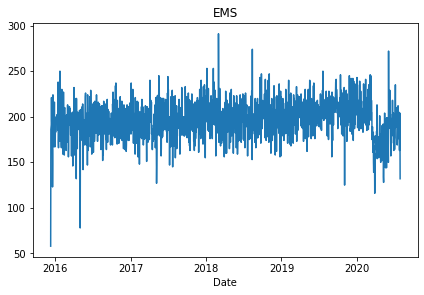

In [102]:
df[df["Reason"]=="EMS"].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title("EMS")

In [107]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()["Reason"].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

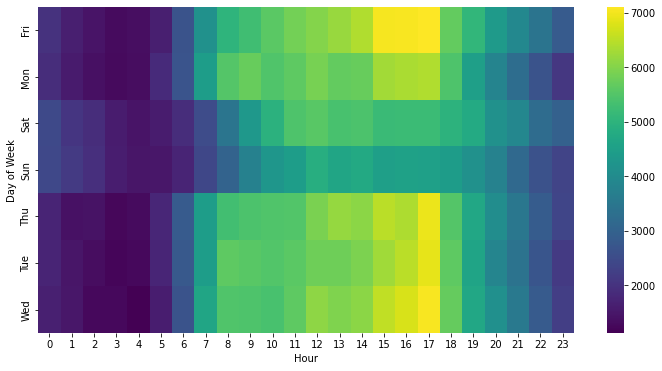

In [110]:
plt.figure(figsize = (12,6))
sns.heatmap(dayHour, cmap='viridis')

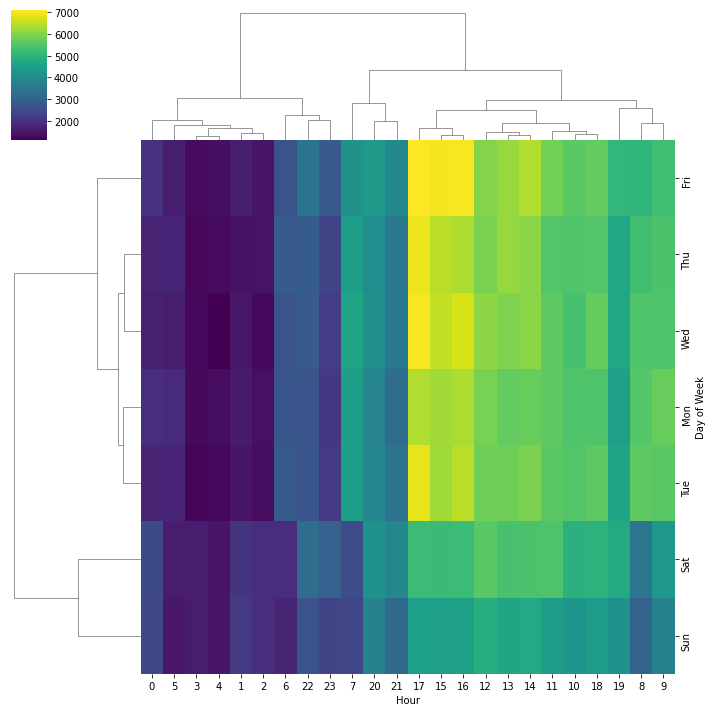

In [111]:
sns.clustermap(dayHour, cmap='viridis')

In [112]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()["Reason"].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

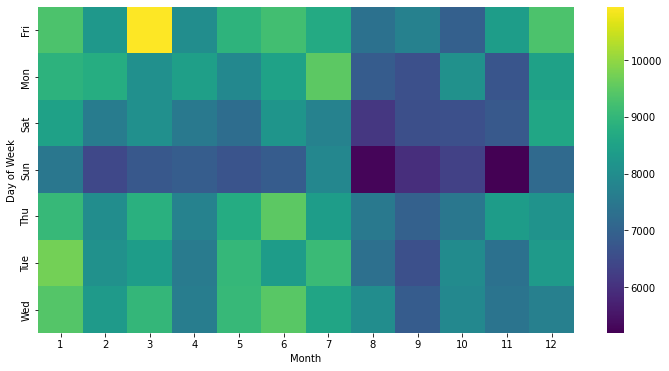

In [113]:
plt.figure(figsize = (12,6))
sns.heatmap(dayMonth, cmap='viridis')

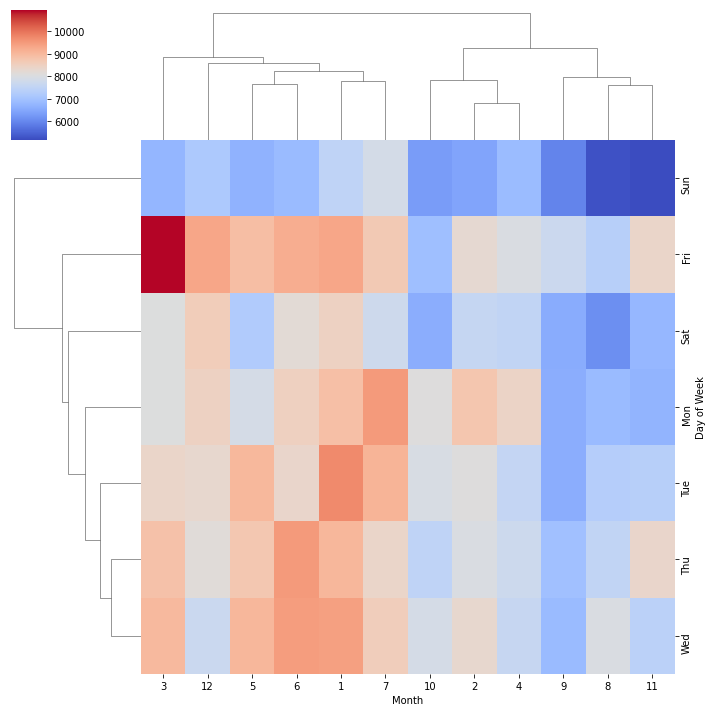

In [115]:
sns.clustermap(dayMonth, cmap='coolwarm')